     index        time     open     high      low    close  \
0      153  1609545600   730.97   789.21   715.22   775.30   
1      154  1609632000   775.29  1015.14   770.00   980.44   
2      155  1609718400   980.44  1168.99   886.33  1042.38   
3      156  1609804800  1042.24  1136.93   975.00  1103.73   
4      157  1609891200  1103.71  1215.98  1058.32  1212.02   
..     ...         ...      ...      ...      ...      ...   
134    287  1621123200  3648.16  3878.23  3334.88  3585.62   
135    288  1621209600  3584.79  3590.00  3101.00  3283.32   
136    289  1621296000  3283.32  3567.40  3241.06  3375.96   
137    290  1621382400  3376.98  3444.96  1900.00  2443.91   
138    291  1621468800  2443.91  2999.99  2156.00  2775.07   

     ETHUSD, BITSTAMP: Open  ETHUSD, BITSTAMP: High  ETHUSD, BITSTAMP: Low  \
0                    731.99                  788.82                 717.00   
1                    775.40                 1014.70                 769.95   
2                    

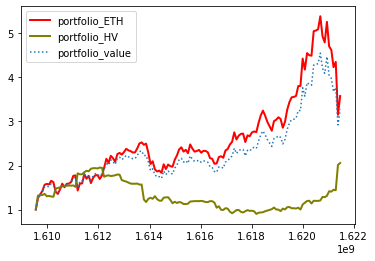

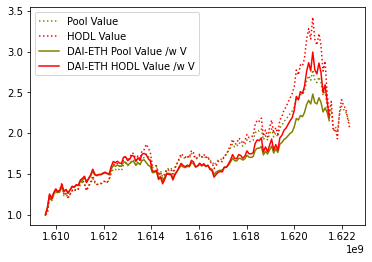

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('eth-usd-price-with-volitility.csv')

initialEqity = 1

percentInV = 20
percentInEth = 100 - percentInV

# print(df) 

timeStart = 1609545600
df = df[df['time'] >= timeStart]



timeEnd = 1621468800
df = df[df['time'] <= timeEnd]
df.reset_index(inplace = True)

df 
# df['close_pct_change']=1+df['close'].pct_change(periods=1)
# df['eth_value'] = (precentInEth*0.01*initialEqity)



df['portfolio_ETH'] = df['close']/(df['close'][0]/initialEqity)

df['portfolio_HV'] = df['HV']/(df['HV'][0]/initialEqity)

df['eth_value'] = df['close']/(df['close'][0]/(percentInEth*0.01*initialEqity))
df['ethvol_value'] = df['HV']/(df['HV'][0]/(percentInV*0.01*initialEqity))
df['portfolio_value'] = df['ethvol_value']+df['eth_value']

print(df) 

plt.plot(df['time'], df['portfolio_ETH'], color='red', linewidth=2, label="portfolio_ETH")
plt.plot(df['time'], df['portfolio_HV'], color='olive', linewidth=2, label="portfolio_HV")
plt.plot(df['time'], df['portfolio_value'], linestyle = 'dotted', label="portfolio_value")

plt.legend()
# show graph
plt.show()

df2 = pd.read_csv('ittb-il-weth-dai.csv')
df2 = df2[df2['TIME (America/New York)'].str.contains('00:00:00')]
df2 = df2.rename({'TIME (America/New York)': 'time'}, axis='columns')
df2['time'] = pd.to_datetime(df2['time'])
df2['time'] = df2['time'].values.astype(np.int64) // 10 ** 9
df2.reset_index(inplace = True)

df2['DAI-ETH Pool Value w V percent share'] = df2['DAI-ETH Pool Value']*(1-(percentInV/100))
df2['DAI-ETH HODL Value w V percent share'] = df2['DAI-ETH HODL Value']*(1-(percentInV/100))
df2['Value Pool w V'] = df2['DAI-ETH Pool Value w V percent share']+ df['ethvol_value']
df2['Value HODL w V'] = df2['DAI-ETH HODL Value w V percent share']+ df['ethvol_value']
plt.plot(df2['time'], df2['DAI-ETH Pool Value'], color='olive', linestyle = 'dotted', label="Pool Value")
plt.plot(df2['time'], df2['DAI-ETH HODL Value'], color='red', linestyle = 'dotted', label="HODL Value")
plt.plot(df2['time'], df2['Value Pool w V'], color='olive', label="DAI-ETH Pool Value /w V")
plt.plot(df2['time'], df2['Value HODL w V'], color='red', label="DAI-ETH HODL Value /w V")


plt.legend()
# show graph
plt.show()

In [175]:

# print(df2)
# print(df)
df2

,index,time,DAI-ETH Pool ROI (USD),DAI-ETH HODL ROI (USD),Impermanent Gain/Loss,DAI-ETH Pool Value,DAI-ETH HODL Value
0,0,1609545600,0.000000,0.000000,0.000000,0.997000,0.997000
1,24,1609632000,0.034934,0.034339,0.000575,1.031830,1.031237
2,48,1609718400,0.221522,0.240331,-0.015164,1.217858,1.236610
3,72,1609804800,0.167474,0.172850,-0.004584,1.163972,1.169332
4,96,1609891200,0.234676,0.250554,-0.012697,1.230972,1.246803
...,...,...,...,...,...,...,...
144,3453,1621987200,1.338079,1.418319,-0.033180,2.331066,2.411065
145,3477,1622073600,1.297031,1.344726,-0.020342,2.290140,2.337693
146,3501,1622160000,1.275874,1.311625,-0.015466,2.269048,2.304691
147,3525,1622246400,1.195477,1.182426,0.005980,2.188892,2.175880


In [177]:
ticker =df['portfolio_ETH']

Roll_Max = ticker.cummax()
Daily_Drawdown = ticker/Roll_Max - 1.0
Max_DD = Daily_Drawdown.cummin()

print(Roll_Max)
print(Daily_Drawdown)
print(Max_DD)
Sharpe_Ratio = df['close'].pct_change(periods=1).mean() / df['close'].pct_change(periods=1).std()
print((364**0.5)*(Sharpe_Ratio))

Sharpe_Ratio = df['HV'].pct_change(periods=1).mean() / df['HV'].pct_change(periods=1).std()
print((364**0.5)*(Sharpe_Ratio))

Sharpe_Ratio = df['portfolio_value'].pct_change(periods=1).mean() / df['portfolio_value'].pct_change(periods=1).std()
print((364**0.5)*(Sharpe_Ratio))


0      0.315846
1      0.399417
2      0.424650
3      0.449643
4      0.493759
         ...   
134    1.702772
135    1.702772
136    1.702772
137    1.702772
138    1.702772
Name: portfolio_ETH, Length: 139, dtype: float64
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
134   -0.142147
135   -0.214472
136   -0.192308
137   -0.415299
138   -0.336070
Name: portfolio_ETH, Length: 139, dtype: float64
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
134   -0.273620
135   -0.273620
136   -0.273620
137   -0.415299
138   -0.415299
Name: portfolio_ETH, Length: 139, dtype: float64
3.3097152651461137
2.1772445822223436
3.4059519668812523


,time,DAI-ETH Pool ROI (USD),DAI-ETH HODL ROI (USD),Impermanent Gain/Loss,DAI-ETH Pool Value,DAI-ETH HODL Value
0,1609545600,0.000000,0.000000,0.000000,0.997000,0.997000
24,1609632000,0.034934,0.034339,0.000575,1.031830,1.031237
48,1609718400,0.221522,0.240331,-0.015164,1.217858,1.236610
72,1609804800,0.167474,0.172850,-0.004584,1.163972,1.169332
96,1609891200,0.234676,0.250554,-0.012697,1.230972,1.246803
...,...,...,...,...,...,...
3453,1621987200,1.338079,1.418319,-0.033180,2.331066,2.411065
3477,1622073600,1.297031,1.344726,-0.020342,2.290140,2.337693
3501,1622160000,1.275874,1.311625,-0.015466,2.269048,2.304691
3525,1622246400,1.195477,1.182426,0.005980,2.188892,2.175880
